# Project 1: SAT & ACT Analysis

## Background

The project provides data collected from ACT and SAT college entrance exams administered in the US on a state by state basis from 2017 to 2018. Using lessons learned through the 1.5 weeks of the course so far we are required to clean the data, do data analysis, visualisation, and hypothesis testing.

## Problem Statement

Using the ACT and SAT 2017/2018 testing data, what analysis can we draw from it and subsequently use this information to improve SAT participation rates?

## Executive Summary

The project this project, we executed and documented the process of obtaining text-based data, cleaning and organizing in our Python Pandas DataFrames, and plotting data to extract meaningful insights.  

Data is displayed both in queried tabular form as well as in Histograms, Scatter Plots, and Box Plots from Python's Seaborn/Matplotlib visualization libraries. Through the use of these displays, assembled with custom-built functions, we identified a 2 distinct areas of opportunties, legislation and political leaning. This helped us to short-list potential states where we can implement our recommendations.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [124]:
# importing 2017 SAT & ACT Data
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

In [125]:
type(sat_2017)

pandas.core.frame.DataFrame

#### 2a. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [126]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [127]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [128]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [129]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

The SAT data has data seperate by state and provides the participation rate of students, the average score for the combination of reading and writing in the English language, the average math score as well as the total average overall score. 

The ACT data has data also seperated by state and provides the participation rate of the students, the average score in 4 different categories; English, Math, Reading and Science, as well as the average composite score. 

THe major difference in the two data is that the SAT data does not include National level statistics will the ACT data does.

#### 4a. Does the data look complete? 

Answer:

No the data does not look complete there appears to be an additional row of data for ACT 2017 data which includes the National level results. This is missing in the SAT 2017 data. Apart from that, we also do not know the minimum and maximum score for each test

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

Answer: 

ACT scores range between 1 and 36. We can see that there might be an error with ACT 2017 Science score as it is very low (2.3). [Source](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)

SAT scores range from 200 to 800. We can see that there might be an error with SAT 2017 Math score as it is very low (52.0). [Source](https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/interpreting)

In [130]:
sat_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


In [131]:
act_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [132]:
act_2017['Science'].sort_values().head()

21     2.3
29    18.2
25    18.8
41    18.9
34    19.3
Name: Science, dtype: float64

In [133]:
# source https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

act_2017.iloc[21, 5] = 23.2

In [134]:
act_2017['Science'][21]

23.2

In [135]:
sat_2017['Math'].sort_values().head()

20     52
8     468
7     492
12    493
22    495
Name: Math, dtype: int64

In [136]:
sat_2017.iloc[20, 3] = 524

In [137]:
sat_2017['Math'][20]

524

#### 5. What are your data types? 
Display the data types of each feature. 

In [138]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [139]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation data for both ACT and SAT tables should be a float percentage instead of "object" strings for easier manipulation. ACT composite data should also be float, since it is a sum of 4 other float values.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [140]:
# function that will allow convertion of participation rates to appropriate numeric type 
def participation_convert(df):
    df['Participation'] = df['Participation'].apply(lambda value: float(value.replace('%', ''))) 
    return df

In [141]:
# converting the sat_2017 participation data
sat_2017 = participation_convert(sat_2017)

In [142]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [143]:
# converting the act_2017 participation data
act_2017 = participation_convert(act_2017)

In [144]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [145]:
for value, composite_score in enumerate(act_2017['Composite']):    
    try: 
        float(composite_score)                              # Try to float all default object vals
    except: 
        print(value, composite_score)                       # Identify unacceptable values

51 20.2x


In [146]:
act_2017.iloc[51, 6] = 20.2

In [147]:
act_2017['Composite'] = act_2017['Composite'].astype('float')

- Display the data types again to confirm they are correct.

In [148]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [149]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [150]:
print(sat_2017.columns)
print(act_2017.columns)

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')
Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')


In [151]:
# renaming sat_2017 using a dictionary
sat_2017_columns_dict = {'Participation': 'SAT_Participation_2017 (%)',
                         'Evidence-Based Reading and Writing': 'SAT_ERW_2017',
                         'Math': 'SAT_Math_2017',
                         'Total': 'SAT_Total_2017'}

sat_2017.rename(columns = sat_2017_columns_dict, inplace = True)
sat_2017.columns

Index(['State', 'SAT_Participation_2017 (%)', 'SAT_ERW_2017', 'SAT_Math_2017',
       'SAT_Total_2017'],
      dtype='object')

In [152]:
# renaming act_2017 using a dictionary
act_2017_columns_dict = {'Participation': 'ACT_Participation_2017 (%)',
                         'English': 'ACT_English_2017',
                         'Math': 'ACT_Math_2017',
                         'Reading': 'ACT_Reading_2017',
                         'Science': 'ACT_Science_2017',
                         'Composite': 'ACT_Composite_2017'}

act_2017.rename(columns = act_2017_columns_dict, inplace = True)
act_2017.columns

Index(['State', 'ACT_Participation_2017 (%)', 'ACT_English_2017',
       'ACT_Math_2017', 'ACT_Reading_2017', 'ACT_Science_2017',
       'ACT_Composite_2017'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**State**|*object*|ACT|The state in which test data was collected|
|**ACT_Participation_2017**|*float*|ACT|Participation rate of students by state that took ACT during 2017|
|**ACT_English_2017**|*float*|ACT|Mean score for ACT English tests taken in state during 2017|
|**ACT_Math_2017**|*float*|ACT|Mean score for ACT Math tests taken in state during 2017|
|**ACT_Reading_2017**|*float*|ACT|Mean score for ACT Reading tests taken in state during 2017|
|**ACT_Science_2017**|*float*|ACT|Mean score for ACT Science tests taken in state during 2017|
|**ACT_Composite_2017**|*float*|ACT|Mean composite score for ACT taken in state during 2017|
|**SAT_Participation_2017**|*float*|SAT|Participation rate of students by state that took SAT during 2017|
|**SAT_English_2017**|*int*|SAT|Mean score for SAT Evidence-Based Reading & Writing (ERW) tests taken in state during 2017|
|**SAT_Math_2017**|*int*|SAT|Mean score for SAT Math tests taken in state during 2017|
|**SAT_Total_2017**|*int*|SAT|Mean composite score for SAT ERW and Math tests taken in state during 2017|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [153]:
# Find 'National' in act_2017 data
act_2017[act_2017['State'] == 'National']

,State,ACT_Participation_2017 (%),ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0


In [154]:
# Drop this row 
act_2017 = act_2017.drop(0)

In [155]:
# Reset the index
act_2017.reset_index(drop = True, inplace = True)

In [156]:
act_2017.head()

,State,ACT_Participation_2017 (%),ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [157]:
act_sat_2017 = act_2017.merge(sat_2017, how = 'inner', on = 'State')

In [158]:
act_sat_2017.head()

,State,ACT_Participation_2017 (%),ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017,SAT_Participation_2017 (%),SAT_ERW_2017,SAT_Math_2017,SAT_Total_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [159]:
# Export to csv file without index column in file
act_sat_2017.to_csv("../data/combined_2017.csv", index = False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [160]:
# import 2018 results for ACT and SAT test
act_2018 = pd.read_csv("../data/act_2018.csv")
sat_2018 = pd.read_csv("../data/sat_2018.csv")

In [161]:
# check import data
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


The data from act_2018.csv is missing the individual subject data. This would mean that the csv file is missing key entries.

In [162]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [163]:
# import the updated act_2018 data
act_2018 = pd.read_csv("../data/act_2018_updated.csv")

In [164]:
# re-check the act_2018 data
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [165]:
# checking if there is additional row or columns as well as dtype
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [166]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [167]:
# changing act 2018 participation to the same type as 2017 data
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].astype('float')
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [168]:
# changing the values of the sat 2018 participation data to the same format as 2017 data
sat_2018 = participation_convert(sat_2018)
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [169]:
# rename the columns to the appropriate naming
act_2018_columns_dict = {'Percentage of Students Tested': 'ACT_Participation_2018 (%)',
                         'Average English Score': 'ACT_English_2018',
                         'Average Math Score': 'ACT_Math_2018',
                         'Average Reading Score': 'ACT_Reading_2018',
                         'Average Science Score': 'ACT_Science_2018',
                         'Average Composite Score': 'ACT_Composite_2018'}

act_2018.rename(columns = act_2018_columns_dict, inplace = True)
act_2018.columns

Index(['State', 'ACT_Participation_2018 (%)', 'ACT_Composite_2018',
       'ACT_English_2018', 'ACT_Math_2018', 'ACT_Reading_2018',
       'ACT_Science_2018'],
      dtype='object')

In [170]:
# renaming sat_2018 columns to the appropriate naming
sat_2018_columns_dict = {'Participation': 'SAT_Participation_2018 (%)',
                         'Evidence-Based Reading and Writing': 'SAT_ERW_2018',
                         'Math': 'SAT_Math_2018',
                         'Total': 'SAT_Total_2018'}

sat_2018.rename(columns = sat_2018_columns_dict, inplace = True)
sat_2018.columns

Index(['State', 'SAT_Participation_2018 (%)', 'SAT_ERW_2018', 'SAT_Math_2018',
       'SAT_Total_2018'],
      dtype='object')

In [171]:
# shifting the columns in act_2018 to make formatting the same as 2017 data
act_2018 = act_2018[['State', 'ACT_Participation_2018 (%)', 'ACT_English_2018', 'ACT_Math_2018', 'ACT_Reading_2018', 'ACT_Science_2018', 'ACT_Composite_2018']]
act_2018.head()

,State,ACT_Participation_2018 (%),ACT_English_2018,ACT_Math_2018,ACT_Reading_2018,ACT_Science_2018,ACT_Composite_2018
0,Alabama,100.0,18.9,18.3,19.6,19.0,19.1
1,Alaska,33.0,19.8,20.6,21.6,20.7,20.8
2,Arizona,66.0,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100.0,19.1,18.9,19.7,19.4,19.4
4,California,27.0,22.5,22.5,23.0,22.1,22.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [172]:
# combining 2018 data using State as the common denominator 
act_sat_2018 = act_2018.merge(sat_2018, how = 'inner', on = 'State')

In [173]:
act_sat_2018.head()

,State,ACT_Participation_2018 (%),ACT_English_2018,ACT_Math_2018,ACT_Reading_2018,ACT_Science_2018,ACT_Composite_2018,SAT_Participation_2018 (%),SAT_ERW_2018,SAT_Math_2018,SAT_Total_2018
0,Alabama,100.0,18.9,18.3,19.6,19.0,19.1,6.0,595,571,1166
1,Alaska,33.0,19.8,20.6,21.6,20.7,20.8,43.0,562,544,1106
2,Arizona,66.0,18.2,19.4,19.5,19.2,19.2,29.0,577,572,1149
3,Arkansas,100.0,19.1,18.9,19.7,19.4,19.4,5.0,592,576,1169
4,California,27.0,22.5,22.5,23.0,22.1,22.7,60.0,540,536,1076


In [174]:
# combining 2017 data with 2018 data
act_sat_final = act_sat_2017.merge(act_sat_2018, how = 'inner', on = 'State')

In [175]:
# checking to ensure the two dataframes are merged correctly along with the corrensponding row/columns/dtypes
act_sat_final.head()

,State,ACT_Participation_2017 (%),ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017,SAT_Participation_2017 (%),SAT_ERW_2017,SAT_Math_2017,...,ACT_Participation_2018 (%),ACT_English_2018,ACT_Math_2018,ACT_Reading_2018,ACT_Science_2018,ACT_Composite_2018,SAT_Participation_2018 (%),SAT_ERW_2018,SAT_Math_2018,SAT_Total_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100.0,18.9,18.3,19.6,19.0,19.1,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33.0,19.8,20.6,21.6,20.7,20.8,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66.0,18.2,19.4,19.5,19.2,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100.0,19.1,18.9,19.7,19.4,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27.0,22.5,22.5,23.0,22.1,22.7,60.0,540,536,1076


In [176]:
act_sat_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       51 non-null     object 
 1   ACT_Participation_2017 (%)  51 non-null     float64
 2   ACT_English_2017            51 non-null     float64
 3   ACT_Math_2017               51 non-null     float64
 4   ACT_Reading_2017            51 non-null     float64
 5   ACT_Science_2017            51 non-null     float64
 6   ACT_Composite_2017          51 non-null     float64
 7   SAT_Participation_2017 (%)  51 non-null     float64
 8   SAT_ERW_2017                51 non-null     int64  
 9   SAT_Math_2017               51 non-null     int64  
 10  SAT_Total_2017              51 non-null     int64  
 11  ACT_Participation_2018 (%)  51 non-null     float64
 12  ACT_English_2018            51 non-null     float64
 13  ACT_Math_2018               51 non-nu

In [177]:
act_sat_final.to_csv('../data/final.csv', index = False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [178]:
# transpose of final dataframe using describe()
act_sat_final.describe().T

,count,mean,std,min,25%,50%,75%,max
ACT_Participation_2017 (%),51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
ACT_English_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
ACT_Math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
ACT_Reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
ACT_Science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
ACT_Composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
SAT_Participation_2017 (%),51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
SAT_ERW_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
SAT_Math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
SAT_Total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [179]:
# finding the mean
act_sat_final['ACT_Composite_2017'].mean()

21.519607843137255

In [180]:
# Writing a function to calculate standard deviation using the above formula
def std_dev(series_values):
    mu = series_values.mean()                         
    sum_value = 0
    for value in series_values.tolist():
        sum_value += ((value - mu) ** 2)
    return np.sqrt(sum_value/series_values.size)

In [181]:
std_dev(act_sat_final['SAT_Total_2017'])

91.58351056778743

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [182]:
# standard deviation dictionary comprehension
sd = {col_title: std_dev(act_sat_final[col_title]) for col_title in act_sat_final.columns if col_title != 'State'}

In [183]:
sd

{'ACT_Participation_2017 (%)': 31.824175751231806,
 'ACT_English_2017': 2.3304876369363363,
 'ACT_Math_2017': 1.9624620273436781,
 'ACT_Reading_2017': 2.0469029314842646,
 'ACT_Science_2017': 1.7222161451443676,
 'ACT_Composite_2017': 2.000786081581989,
 'SAT_Participation_2017 (%)': 34.92907076664508,
 'SAT_ERW_2017': 45.21697020437866,
 'SAT_Math_2017': 46.65713364485503,
 'SAT_Total_2017': 91.58351056778743,
 'ACT_Participation_2018 (%)': 33.745194881997506,
 'ACT_English_2018': 2.4222536143202795,
 'ACT_Math_2018': 2.015707255555717,
 'ACT_Reading_2018': 2.145891884510421,
 'ACT_Science_2018': 1.8516885484833543,
 'ACT_Composite_2018': 2.0855261815801147,
 'SAT_Participation_2018 (%)': 36.946619223539415,
 'SAT_ERW_2018': 47.03460978357609,
 'SAT_Math_2018': 47.30194550378352,
 'SAT_Total_2018': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [184]:
# using numpy to calculate the standard deviation to cross check between both pandas and manual calculation
np_std_dict_ddof_0 = {col_title: np.std(act_sat_final[col_title]) for col_title in act_sat_final.columns if col_title != 'State'}
np_std_dict_ddof_1 = {col_title: np.std(act_sat_final[col_title], ddof = 1) for col_title in act_sat_final.columns if col_title != 'State'}

In [185]:
# where ddof = 0, population standard deviation
np_std_dict_ddof_0

{'ACT_Participation_2017 (%)': 31.824175751231806,
 'ACT_English_2017': 2.3304876369363363,
 'ACT_Math_2017': 1.9624620273436781,
 'ACT_Reading_2017': 2.0469029314842646,
 'ACT_Science_2017': 1.7222161451443676,
 'ACT_Composite_2017': 2.000786081581989,
 'SAT_Participation_2017 (%)': 34.92907076664508,
 'SAT_ERW_2017': 45.21697020437866,
 'SAT_Math_2017': 46.65713364485503,
 'SAT_Total_2017': 91.58351056778743,
 'ACT_Participation_2018 (%)': 33.745194881997506,
 'ACT_English_2018': 2.4222536143202795,
 'ACT_Math_2018': 2.015707255555717,
 'ACT_Reading_2018': 2.145891884510421,
 'ACT_Science_2018': 1.8516885484833543,
 'ACT_Composite_2018': 2.0855261815801147,
 'SAT_Participation_2018 (%)': 36.946619223539415,
 'SAT_ERW_2018': 47.03460978357609,
 'SAT_Math_2018': 47.30194550378352,
 'SAT_Total_2018': 93.22742384464433}

In [186]:
# where ddof = 1, sample standard deviation
np_std_dict_ddof_1

{'ACT_Participation_2017 (%)': 32.14084201588683,
 'ACT_English_2017': 2.35367713980303,
 'ACT_Math_2017': 1.9819894936505533,
 'ACT_Reading_2017': 2.0672706264873146,
 'ACT_Science_2017': 1.7393530462812443,
 'ACT_Composite_2017': 2.020694891154341,
 'SAT_Participation_2017 (%)': 35.276632270013046,
 'SAT_ERW_2017': 45.66690138768932,
 'SAT_Math_2017': 47.12139516560329,
 'SAT_Total_2017': 92.49481172519046,
 'ACT_Participation_2018 (%)': 34.08097623567245,
 'ACT_English_2018': 2.4463562339793055,
 'ACT_Math_2018': 2.035764538177723,
 'ACT_Reading_2018': 2.1672445684804105,
 'ACT_Science_2018': 1.8701137639716146,
 'ACT_Composite_2018': 2.1062781969951776,
 'SAT_Participation_2018 (%)': 37.31425633039196,
 'SAT_ERW_2018': 47.50262737831599,
 'SAT_Math_2018': 47.77262322095955,
 'SAT_Total_2018': 94.15508275097599}

Answer:

The manually calculated standard deviation does not match up with the pandas standard deviation because pandas standard deviation function utilises the formula for sample standard deviation where summation values are divided by N-1 instead of N in the manually calculated standard deviation. The reason we use a N-1 calculation for sample size is because we want to get an unbiased estimator.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

# Investigating Data Trends

 - [SAT Trends 2017/2018](#Highest-SAT-Participation-Rates)
*  [Highest SAT Participation Rates](#Highest-SAT-Participation-Rates)
*  [Lowest SAT Participation Rates](#Lowest-SAT-Participation-Rates)
*  [Highest SAT Total Score](#Highest-SAT-Total-Score)
*  [Lowest SAT Total Score](#Lowest-SAT-Total-Score)
 - [ACT Trends 2017/2018](#Highest-ACT-Participation-Rates)
*  [Highest ACT Participation Rates](#Highest-ACT-Participation-Rates)
*  [Lowest ACT Participation Rates](#Lowest-ACT-Participation-Rates)
*  [Highest ACT Composite Score](#Highest-ACT-Composite-Score)
*  [Lowest ACT Composite Score](#Lowest-ACT-Composite-Score)
 - [Full Participation States](#Full-Participation-States)
*  [Participation Changes (YoY)](#Participation-Changes-(YoY))
*  [Score Changes](#Score-Changes)
 - [Over 50% Participation on Both Tests](#Over-50%-Participation-on-Both-Tests)

## Highest SAT Participation Rates

#### Highest SAT Participation Rates 2017

In [187]:
act_sat_final.columns

Index(['State', 'ACT_Participation_2017 (%)', 'ACT_English_2017',
       'ACT_Math_2017', 'ACT_Reading_2017', 'ACT_Science_2017',
       'ACT_Composite_2017', 'SAT_Participation_2017 (%)', 'SAT_ERW_2017',
       'SAT_Math_2017', 'SAT_Total_2017', 'ACT_Participation_2018 (%)',
       'ACT_English_2018', 'ACT_Math_2018', 'ACT_Reading_2018',
       'ACT_Science_2018', 'ACT_Composite_2018', 'SAT_Participation_2018 (%)',
       'SAT_ERW_2018', 'SAT_Math_2018', 'SAT_Total_2018'],
      dtype='object')

In [188]:
act_sat_final[['State', 'SAT_Participation_2017 (%)']].sort_values(by = ['SAT_Participation_2017 (%)'], ascending = False).head(10)

,State,SAT_Participation_2017 (%)
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0
19,Maine,95.0
12,Idaho,93.0
9,Florida,83.0
21,Massachusetts,76.0
39,Rhode Island,71.0


#### Highest SAT Participation Rates 2018

In [189]:
act_sat_final[['State', 'SAT_Participation_2018 (%)']].sort_values(by = ['SAT_Participation_2018 (%)'], ascending = False).head(10)

,State,SAT_Participation_2018 (%)
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0
19,Maine,99.0
13,Illinois,99.0
39,Rhode Island,97.0
29,New Hampshire,96.0
8,District of Columbia,92.0


We can see an increase from 4 states to 5 states with full participation. The huge jump seems to suggest that the State of Colorado likely implemented a mandatory policy for SAT test between 2017 to 2018. 

## Lowest SAT Participation Rates

#### Lowest SAT Participation Rates 2017

In [190]:
act_sat_final[['State', 'SAT_Participation_2017 (%)']].sort_values(by = ['SAT_Participation_2017 (%)']).head(20)

,State,SAT_Participation_2017 (%)
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0
23,Minnesota,3.0
50,Wyoming,3.0


#### Lowest SAT Participation Rates 2018

In [191]:
act_sat_final[['State', 'SAT_Participation_2018 (%)']].sort_values(by = ['SAT_Participation_2018 (%)']).head(20)

,State,SAT_Participation_2018 (%)
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0
24,Mississippi,3.0
15,Iowa,3.0
44,Utah,4.0
23,Minnesota,4.0
18,Louisiana,4.0


We can see that North Dakota top the list for lowest participation in both 2017 and 2018 at 2%. Apart from that we can see that generally states that have low participation rate display similar rates year on year.

## Highest SAT Total Score

#### Highest SAT Total Score 2017

In [192]:
act_sat_final[['State', 'SAT_Total_2017']].sort_values(by = ['SAT_Total_2017'], ascending = False).head()

,State,SAT_Total_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


#### Highest SAT Total Score 2018

In [193]:
act_sat_final[['State', 'SAT_Total_2018']].sort_values(by = ['SAT_Total_2018'], ascending = False).head()

,State,SAT_Total_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


#### Highest SAT Total Score 2017 where state participation >= 50%

In [194]:
act_sat_final[act_sat_final['SAT_Participation_2017 (%)'] >= 50][['State', 'SAT_Participation_2017 (%)', 'SAT_Total_2017']].sort_values(by = ['SAT_Total_2017'], ascending = False).head()

,State,SAT_Participation_2017 (%),SAT_Total_2017
45,Vermont,60.0,1114
21,Massachusetts,76.0,1107
46,Virginia,65.0,1102
11,Hawaii,55.0,1085
47,Washington,64.0,1075


#### Highest SAT Total Score 2018 where state participation >= 50%

In [195]:
act_sat_final[act_sat_final['SAT_Participation_2017 (%)'] >= 50][['State', 'SAT_Participation_2018 (%)', 'SAT_Total_2018']].sort_values(by = ['SAT_Total_2018'], ascending = False).head()

,State,SAT_Participation_2018 (%),SAT_Total_2018
21,Massachusetts,80.0,1125
45,Vermont,64.0,1120
46,Virginia,68.0,1117
9,Florida,56.0,1099
30,New Jersey,82.0,1094


## Lowest SAT Total Score

#### Lowest SAT Total Score 2017

In [196]:
act_sat_final[['State', 'SAT_Total_2017']].sort_values(by = ['SAT_Total_2017']).head()

,State,SAT_Total_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


#### Lowest SAT Total Score 2017 where state participation >= 50%

In [197]:
act_sat_final[act_sat_final['SAT_Participation_2017 (%)'] >= 50][['State', 'SAT_Participation_2017 (%)', 'SAT_Total_2017']].sort_values(by = ['SAT_Total_2017']).head()

,State,SAT_Participation_2017 (%),SAT_Total_2017
8,District of Columbia,100.0,950
7,Delaware,100.0,996
12,Idaho,93.0,1005
22,Michigan,100.0,1005
19,Maine,95.0,1012


#### Lowest SAT Total Score 2018

In [198]:
act_sat_final[['State', 'SAT_Total_2018']].sort_values(by = ['SAT_Total_2018']).head()

,State,SAT_Total_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


#### Lowest SAT Total Score 2018 where state participation >= 50%

In [199]:
act_sat_final[act_sat_final['SAT_Participation_2017 (%)'] >= 50][['State', 'SAT_Participation_2018 (%)', 'SAT_Total_2018']].sort_values(by = ['SAT_Total_2018']).head()

,State,SAT_Participation_2018 (%),SAT_Total_2018
8,District of Columbia,92.0,977
7,Delaware,100.0,998
12,Idaho,100.0,1001
11,Hawaii,56.0,1010
22,Michigan,100.0,1011


We can see that the top performing states in terms of results did not vary much from year to year. By comparing the mean total SAT score with SAT participation rate we start to notice a glaring pattern where top scoring states tend to have lowest participation rate while states with higher participation rates tend to have poor scoring. This is likely due to selection bias. The major outlier in this case is West Virginia, which shows poor scoring despite low participation rates.

## Highest ACT Participation Rates

#### Highest ACT Participation Rates 2017

In [200]:
act_sat_final[act_sat_final['ACT_Participation_2017 (%)'] == 100][['State', 'ACT_Participation_2017 (%)']].sort_values(by = ['ACT_Participation_2017 (%)'], ascending = False)

,State,ACT_Participation_2017 (%)
0,Alabama,100.0
28,Nevada,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
26,Montana,100.0
3,Arkansas,100.0


#### Highest ACT Participation Rates 2018

In [201]:
act_sat_final[act_sat_final['ACT_Participation_2018 (%)'] == 100][['State', 'ACT_Participation_2018 (%)']].sort_values(by = ['ACT_Participation_2018 (%)'], ascending = False)

,State,ACT_Participation_2018 (%)
0,Alabama,100.0
33,North Carolina,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
35,Ohio,100.0
28,Nevada,100.0
3,Arkansas,100.0


We can see that ACT clearly wins out compared to SAT in terms of participation rates in majority of the states. This seems to suggest that states generally prefer to adopt ACT compared to SAT.

## Lowest ACT Participation Rates

#### Lowest ACT Participation Rates 2017

In [202]:
act_sat_final[['State', 'ACT_Participation_2017 (%)']].sort_values(by = ['ACT_Participation_2017 (%)']).head()

,State,ACT_Participation_2017 (%)
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


#### Lowest ACT Participation Rates 2018

In [203]:
act_sat_final[['State', 'ACT_Participation_2018 (%)']].sort_values(by = ['ACT_Participation_2018 (%)']).head()

,State,ACT_Participation_2018 (%)
19,Maine,7.0
39,Rhode Island,15.0
29,New Hampshire,16.0
7,Delaware,17.0
38,Pennsylvania,20.0


The same story can be observed where single digit participation rates for ACT test is less frequently compare to that of SAT test. Which further strengthens the above point.

## Highest ACT Composite Score

#### Highest ACT Composite Score 2017

In [204]:
act_sat_final[['State', 'ACT_Composite_2017']].sort_values(by = ['ACT_Composite_2017'], ascending = False).head()

,State,ACT_Composite_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


#### Highest ACT Composite Score 2017 where state participation >= 50%

In [205]:
act_sat_final[act_sat_final['ACT_Participation_2017 (%)'] >= 50][['State', 'ACT_Participation_2017 (%)', 'ACT_Composite_2017']].sort_values(by = ['ACT_Composite_2017'], ascending = False).head()

,State,ACT_Participation_2017 (%),ACT_Composite_2017
35,Ohio,75.0,22.0
15,Iowa,67.0,21.9
41,South Dakota,80.0,21.8
16,Kansas,73.0,21.7
23,Minnesota,100.0,21.5


#### Highest ACT Composite Score 2018

In [206]:
act_sat_final[['State', 'ACT_Composite_2018']].sort_values(by = ['ACT_Composite_2018'], ascending = False).head()

,State,ACT_Composite_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


#### Highest ACT Composite Score 2018 where state participation >= 50%

In [207]:
act_sat_final[act_sat_final['ACT_Participation_2017 (%)'] >= 50][['State', 'ACT_Participation_2018 (%)', 'ACT_Composite_2018']].sort_values(by = ['ACT_Composite_2018'], ascending = False).head()

,State,ACT_Participation_2018 (%),ACT_Composite_2018
5,Colorado,30.0,23.9
13,Illinois,43.0,23.9
41,South Dakota,77.0,21.9
15,Iowa,68.0,21.8
16,Kansas,71.0,21.6


## Lowest ACT Composite Score

#### Lowest ACT Composite Score 2017

In [208]:
act_sat_final[['State', 'ACT_Composite_2017']].sort_values(by = ['ACT_Composite_2017']).head()

,State,ACT_Composite_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


#### Lowest ACT Composite Score 2018

In [209]:
act_sat_final[['State', 'ACT_Composite_2018']].sort_values(by = ['ACT_Composite_2018']).head()

,State,ACT_Composite_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


#### Lowest ACT Composite Score 2017 where state participation >= 50%

In [210]:
act_sat_final[act_sat_final['ACT_Participation_2017 (%)'] >= 50][['State', 'ACT_Participation_2017 (%)', 'ACT_Composite_2017']].sort_values(by = ['ACT_Composite_2017']).head()

,State,ACT_Participation_2017 (%),ACT_Composite_2017
28,Nevada,100.0,17.8
24,Mississippi,100.0,18.6
40,South Carolina,100.0,18.7
11,Hawaii,90.0,19.0
33,North Carolina,100.0,19.1


#### Lowest ACT Composite Score 2018 where state participation >= 50%

In [211]:
act_sat_final[act_sat_final['ACT_Participation_2017 (%)'] >= 50][['State', 'ACT_Participation_2018 (%)', 'ACT_Composite_2018']].sort_values(by = ['ACT_Composite_2018']).head()

,State,ACT_Participation_2018 (%),ACT_Composite_2018
28,Nevada,100.0,17.7
40,South Carolina,100.0,18.3
24,Mississippi,100.0,18.6
11,Hawaii,89.0,18.9
0,Alabama,100.0,19.1


ACT data shows similar effect as that of SAT data. States with higher mean score tend to be those with lower participation rates, and vice versa. However, like the SAT data outliers are present. Minnesota with 100% participation rate is capable of ranking between the middle in terms of scoring compared to other states.

## Full Participation States

#### Participation Changes (YoY)

In [212]:
# Query for states that had full participation in either year
act_sat_final_part_ch = act_sat_final[(                                                                               # Assigning output to new dataframe
        ((act_sat_final['ACT_Participation_2017 (%)'] == 100) | (act_sat_final['ACT_Participation_2018 (%)'] == 100)) # Include only if full ACT participation
        &                                                                                                             # in either year, AND
        (act_sat_final['ACT_Participation_2017 (%)'] != act_sat_final['ACT_Participation_2018 (%)'])                  # the other year is not also full
        |                                                                                                 
        ((act_sat_final['SAT_Participation_2017 (%)'] == 100) | (act_sat_final['SAT_Participation_2018 (%)'] == 100)) # Include only if full ACT participation
        &                                                                                                             # in either year, AND
        (act_sat_final['SAT_Participation_2017 (%)'] != act_sat_final['SAT_Participation_2018 (%)']))]                # the other year is not also full

act_sat_final_part_ch[['State', 
                       'ACT_Participation_2017 (%)',
                       'ACT_Participation_2018 (%)', 
                       'SAT_Participation_2017 (%)',
                       'SAT_Participation_2018 (%)']]                                    

,State,ACT_Participation_2017 (%),ACT_Participation_2018 (%),SAT_Participation_2017 (%),SAT_Participation_2018 (%)
5,Colorado,100.0,30.0,11.0,100.0
8,District of Columbia,32.0,32.0,100.0,92.0
12,Idaho,38.0,36.0,93.0,100.0
23,Minnesota,100.0,99.0,3.0,4.0
27,Nebraska,84.0,100.0,3.0,3.0
35,Ohio,75.0,100.0,12.0,18.0


#### Score Changes (YoY)

In [238]:
# Adding columns for the delta change between the participation rate as well as the scores

for i in act_sat_final_part_ch.index:
    act_sat_final_part_ch.loc[i,'ACT_Participation_ch (%)'] = act_sat_final_part_ch.loc[i, 'ACT_Participation_2018 (%)'] - act_sat_final_part_ch.loc[i, 'ACT_Participation_2017 (%)']
    act_sat_final_part_ch.loc[i,'SAT_Participation_ch (%)'] = act_sat_final_part_ch.loc[i, 'SAT_Participation_2018 (%)'] - act_sat_final_part_ch.loc[i, 'SAT_Participation_2017 (%)']
    act_sat_final_part_ch.loc[i,'ACT_Composite_ch'] = act_sat_final_part_ch.loc[i, 'ACT_Composite_2018'] - act_sat_final_part_ch.loc[i, 'ACT_Composite_2017']
    act_sat_final_part_ch.loc[i,'SAT_Total_ch'] = act_sat_final_part_ch.loc[i, 'SAT_Total_2018'] - act_sat_final_part_ch.loc[i, 'SAT_Total_2017']

In [214]:
act_sat_final_part_ch[['State',
                       'ACT_Participation_ch (%)',
                       'ACT_Composite_ch',
                       'SAT_Participation_ch (%)',
                       'SAT_Total_ch']]

,State,ACT_Participation_ch (%),ACT_Composite_ch,SAT_Participation_ch (%),SAT_Total_ch
5,Colorado,-70.0,3.1,89.0,-176.0
8,District of Columbia,0.0,-0.6,-8.0,27.0
12,Idaho,-2.0,0.0,7.0,-4.0
23,Minnesota,-1.0,-0.2,1.0,3.0
27,Nebraska,16.0,-1.3,0.0,-1.0
35,Ohio,25.0,-1.7,6.0,-50.0


Herer we sort the data by states that has full participation in either year. We notice the same patterns as mentioned when looking at the highest/lowest score of both test and the participation rate for both test. As mentioned, Colorado huge percentage change over a single year is likely due to the implementation of mandatory SAT test. The inverse relationship between participation rate and scores can also be observed here. 

## Over 50% Participation on Both Tests

In [215]:
# Create dataframe for states that has over 50% participation

act_sat_final_over_50 = act_sat_final[((act_sat_final['ACT_Participation_2017 (%)'] > 50) 
                                        & 
                                       (act_sat_final['SAT_Participation_2017 (%)'] > 50)
                                        |
                                       (act_sat_final['ACT_Participation_2018 (%)'] > 50)
                                        &
                                       (act_sat_final['SAT_Participation_2018 (%)'] > 50))]

In [216]:
act_sat_final_over_50[['State',
                       'ACT_Participation_2017 (%)', 
                       'ACT_Participation_2018 (%)', 
                       'SAT_Participation_2017 (%)', 
                       'SAT_Participation_2018 (%)',
                       'ACT_Composite_2017', 
                       'ACT_Composite_2018', 
                       'SAT_Total_2017', 
                       'SAT_Total_2018']]

,State,ACT_Participation_2017 (%),ACT_Participation_2018 (%),SAT_Participation_2017 (%),SAT_Participation_2018 (%),ACT_Composite_2017,ACT_Composite_2018,SAT_Total_2017,SAT_Total_2018
9,Florida,73.0,66.0,83.0,56.0,19.8,19.9,1017,1099
10,Georgia,55.0,53.0,61.0,70.0,21.4,21.4,1050,1064
11,Hawaii,90.0,89.0,55.0,56.0,19.0,18.9,1085,1010
33,North Carolina,100.0,100.0,49.0,52.0,19.1,19.1,1081,1098
40,South Carolina,100.0,100.0,50.0,55.0,18.7,18.3,1064,1070


All states where students may choose between either the ACT or SAT (or none) perform below the average result in both years.  

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

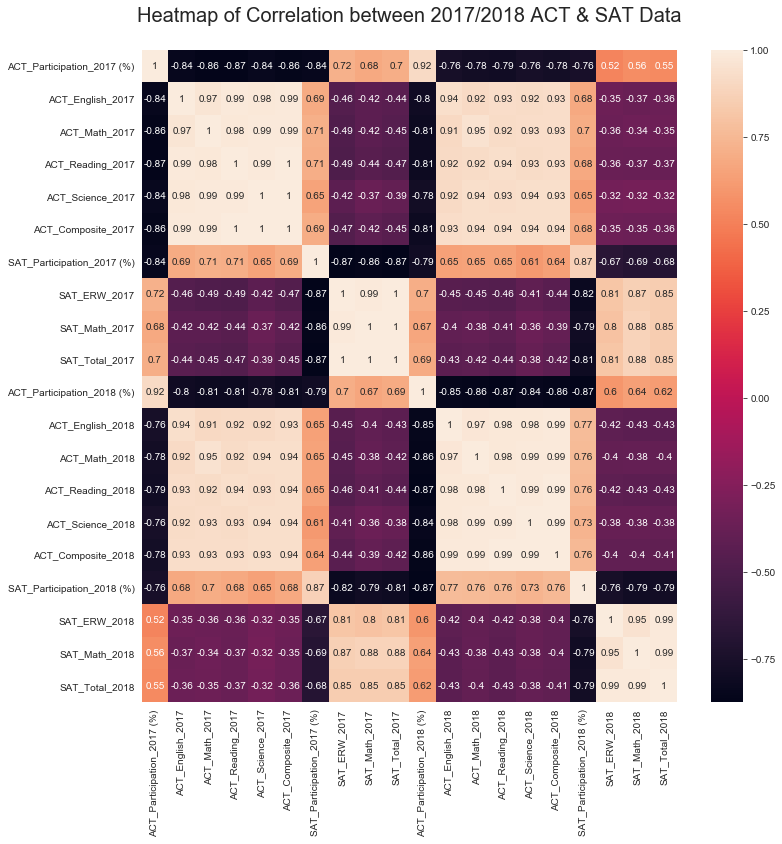

In [217]:
# seaborn heatmap for act_sat_final dataframe
plt.figure(figsize = (12, 12))
plt.title('Heatmap of Correlation between 2017/2018 ACT & SAT Data\n', fontsize = 20)
sns.heatmap(act_sat_final.corr(), annot = True);

The correlation heatmap proceed to further establish the patterns mentioned in the data trend section.

* Mean scores on any given test are highly negatively correlated with participation rate on the given test. This indicates that higher participation rate results in lower mean scores, and vice versa, due to a larger population of students taking the tests resulting in a lower average.  
* Mean scores across different categories of the given tests are highly correlated with one another. This indicates that regardless of participation rates, students across the board are likely to perform just as well across different cateogories and this persists across the both years.  

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [218]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, supertitle):
    sns.set_style('white') # Set seaborn style to increase contrast
    nrows = int(np.ceil(len(list_of_columns) / 2)) # Makes sure you have enough rows   
    fig, ax = plt.subplots(nrows = nrows, ncols = 2, figsize = (12, nrows * 5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        alpha_val = 1
        color_val = 'mediumslateblue'
        
        if '2017' in str(column): # If it's from 2017, change it to .5 opacity
            alpha_val = 0.5
        
        if 'SAT' in str(column): # If it's the SAT, change it to gold
            color_val = 'darkgoldenrod'

        if dataframe[column].max() == 100: # For participation rate
            ax[i].hist(dataframe[column], bins = list(range(0,101,10)), facecolor = color_val, alpha = alpha_val)
            ax[i].set_xticks(list(range(0,101,10)))
            ax[i].axvline(x = dataframe[column].mean(), linestyle = '--',color='orange', linewidth = 2.5)
            ax[i].axvline(x = np.percentile(dataframe[column], 25), linestyle = '--',color='black', linewidth = 1)
            ax[i].axvline(x = np.percentile(dataframe[column], 75), linestyle = '--',color='black', linewidth = 1)
            
        else: # If it's not a participation rate
            ax[i].hist(dataframe[column], facecolor = color_val, alpha = alpha_val) # feel free to add more settings
            ax[i].axvline(x = dataframe[column].mean(), linestyle = '--', color = 'orange', linewidth = 2.5)
            ax[i].axvline(x = np.percentile(dataframe[column], 25), linestyle = '--',color='black', linewidth = 1)
            ax[i].axvline(x = np.percentile(dataframe[column], 75), linestyle = '--',color='black', linewidth = 1)
                
        ax[i].set_title(list_of_titles[i], fontsize = 14) # Do these for all vals
        ax[i].set_xlabel(list_of_xlabels[i])
    
    plt.suptitle(supertitle, fontsize = 18)
    return fig, ax # Return the figure and axes object, to be printed as called

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

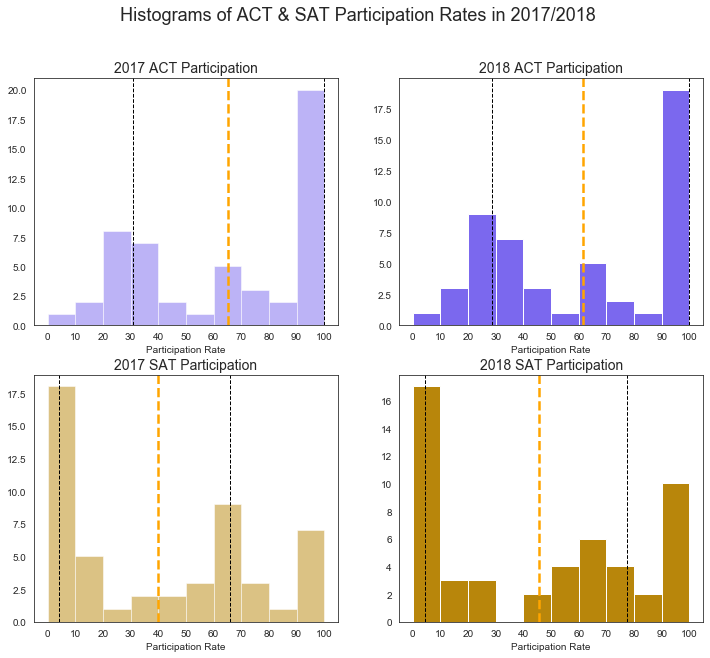

In [219]:
subplothist_part_columns = ['ACT_Participation_2017 (%)', 
                            'ACT_Participation_2018 (%)',
                            'SAT_Participation_2017 (%)', 
                            'SAT_Participation_2018 (%)']

subplothist_part_titles = ['2017 ACT Participation', 
                           '2018 ACT Participation',
                           '2017 SAT Participation', 
                           '2018 SAT Participation']
 
subplothist_part_xlabels = ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate']

fig, ax = subplot_histograms(act_sat_final, 
                             subplothist_part_columns, 
                             subplothist_part_titles, 
                             subplothist_part_xlabels, 
                             'Histograms of ACT & SAT Participation Rates in 2017/2018');

The diagram suggests that SAT test adoption rate is lower across a larger number of states compared to ACT. However, this does not mean that the total number of tests administrated within a single year is higher for ACT as population between the individual states will be the determining factor. We can also observe a growing trend in 100% SAT adoption from year 2017 to 2018. 

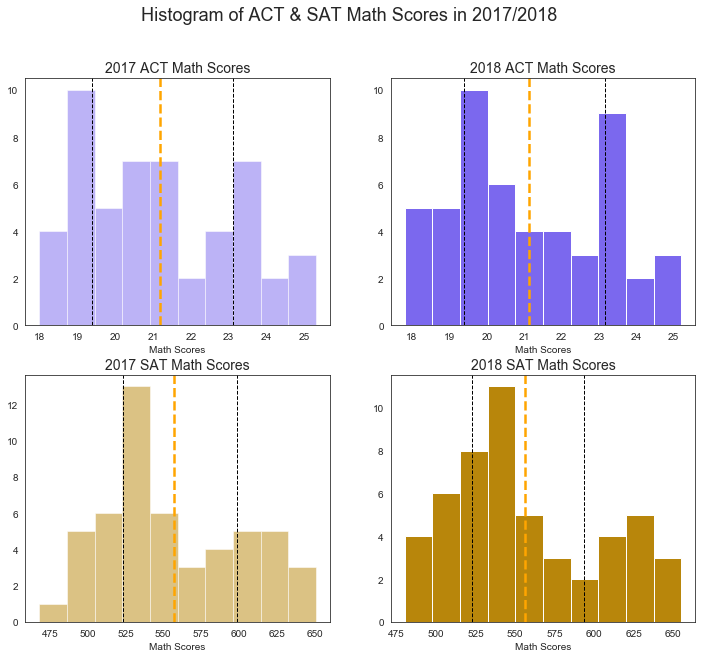

In [220]:
subplothist_math_columns = ['ACT_Math_2017', 
                            'ACT_Math_2018', 
                            'SAT_Math_2017', 
                            'SAT_Math_2018']
#ACT_M
#SAT_M

subplothist_math_titles = ['2017 ACT Math Scores', 
                           '2018 ACT Math Scores', 
                           '2017 SAT Math Scores', 
                           '2018 SAT Math Scores']

subplothist_math_xlabels = ['Math Scores', 'Math Scores', 'Math Scores', 'Math Scores']

fig, ax = subplot_histograms(act_sat_final, 
                             subplothist_math_columns, 
                             subplothist_math_titles, 
                             subplothist_math_xlabels, 
                             'Histogram of ACT & SAT Math Scores in 2017/2018')

We can observer that the mean math score has twin peaks, with one peak lower than the other this seems to suggest that there are two seperate cluster of states. This is likely to be due to the clustering of low participation states score and high participation state scores as evidently in our previous analysis of participation rate to scores. 

In [221]:
# Combine ACT English and Reading test score
act_sat_final.loc[:, 'ACT_Eng_Read_Combine_2017'] = act_sat_final.loc[:, 'ACT_English_2017'] + act_sat_final.loc[:, 'ACT_Reading_2017']
act_sat_final.loc[:, 'ACT_Eng_Read_Combine_2018'] = act_sat_final.loc[:, 'ACT_English_2018'] + act_sat_final.loc[:, 'ACT_Reading_2018']

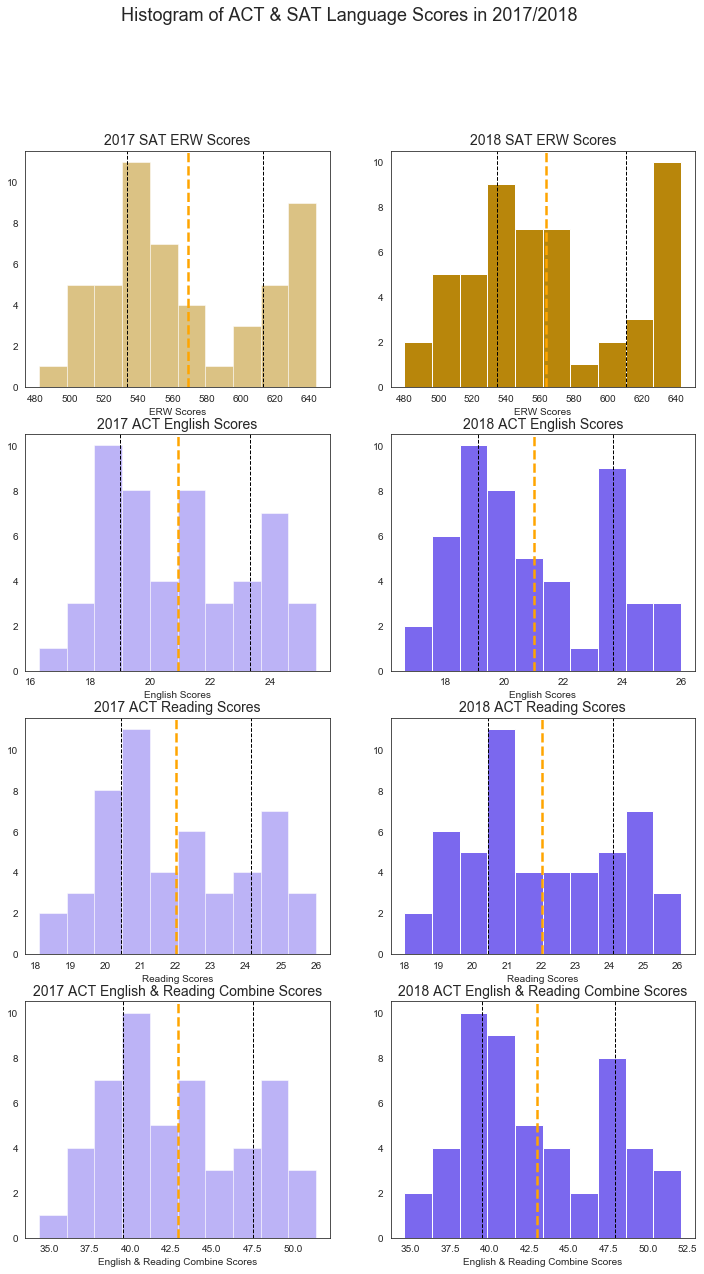

In [222]:
subplothist_eng_columns = ['SAT_ERW_2017',
                           'SAT_ERW_2018',
                           'ACT_English_2017', 
                           'ACT_English_2018',
                           'ACT_Reading_2017', 
                           'ACT_Reading_2018',
                           'ACT_Eng_Read_Combine_2017', 
                           'ACT_Eng_Read_Combine_2018',]

subplothist_eng_titles = ['2017 SAT ERW Scores', 
                          '2018 SAT ERW Scores', 
                          '2017 ACT English Scores',
                          '2018 ACT English Scores', 
                          '2017 ACT Reading Scores',
                          '2018 ACT Reading Scores', 
                          '2017 ACT English & Reading Combine Scores',
                          '2018 ACT English & Reading Combine Scores']

subplothist_eng_xlabels = ['ERW Scores', 
                           'ERW Scores', 
                           'English Scores', 
                           'English Scores', 
                           'Reading Scores', 
                           'Reading Scores',
                           'English & Reading Combine Scores',
                           'English & Reading Combine Scores',]

fig, ax = subplot_histograms(act_sat_final, 
                             subplothist_eng_columns, 
                             subplothist_eng_titles, 
                             subplothist_eng_xlabels, 
                             'Histogram of ACT & SAT Language Scores in 2017/2018')

The same story can also be seen in the mean english score, where twin peaks are evident. This is due to the how highly correlated the categories of scores are to one another within the same test as mentioned earlier. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [223]:
def subplot_scatter(dataframe, list_of_pairs, list_of_pair_labels, list_of_ax_labels, supertitle):
    sns.set_style('white') # Set seaborn style to increase contrast
    nrows = int(np.ceil(len(list_of_pairs) / 2)) # Makes sure you have enough rows   
    fig, ax = plt.subplots(nrows = nrows, ncols = 2, figsize = (12, nrows * 5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, pair in enumerate(list_of_pairs): # Gives us an index value to get into all our lists
        alpha_val = 1
        color_val = 'mediumslateblue'
        sns.regplot(pair[0], pair[1], data = dataframe, ax = ax[i], line_kws = {'color': color_val},
                    scatter_kws = {'color': color_val, 'alpha': alpha_val}) #regplot adds regression automatically
        ax[i].set_title(list_of_ax_labels[i], fontsize = 14) # Do these for all vals
        ax[i].set_xlabel(list_of_pair_labels[i][0])
        ax[i].set_ylabel(list_of_pair_labels[i][1])
    
    plt.suptitle(supertitle, fontsize = 18)
    if len(list_of_pairs) % 2: # delete if it's odd number of pairs to remove an empty plot
        plt.delaxes(ax[len(list_of_pairs)])
    return fig, ax # Return the figure and axes object, to be printed as called

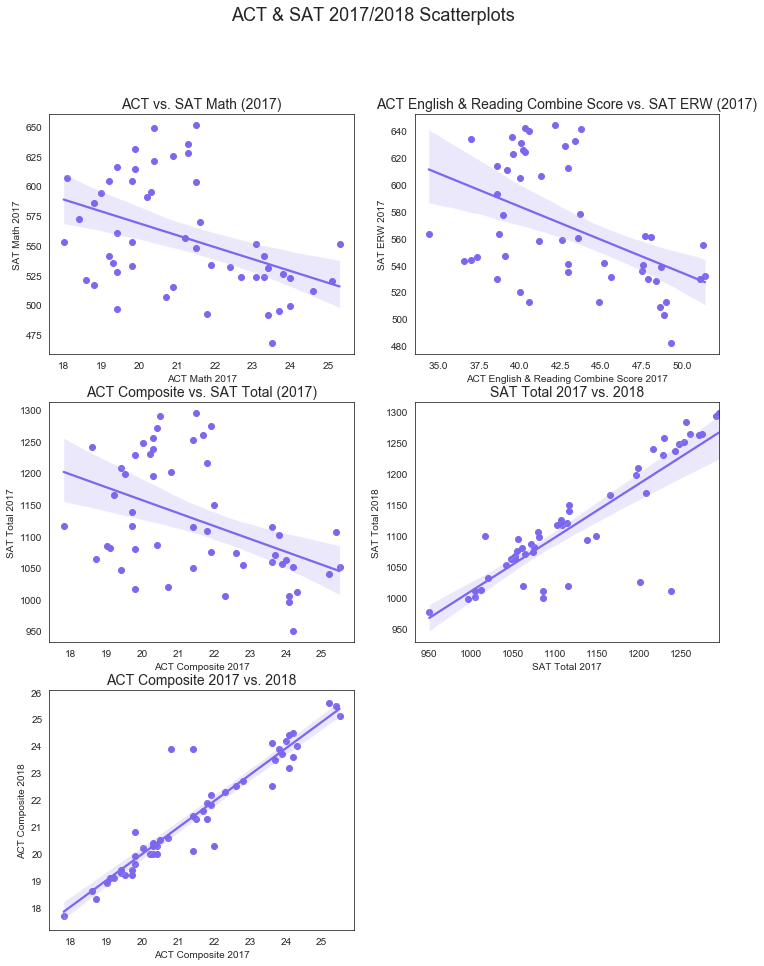

In [224]:
pair_list = [('ACT_Math_2017', 'SAT_Math_2017'),
             ('ACT_Eng_Read_Combine_2017', 'SAT_ERW_2017'),
             ('ACT_Composite_2017', 'SAT_Total_2017'),
             ('SAT_Total_2017', 'SAT_Total_2018'),
             ('ACT_Composite_2017', 'ACT_Composite_2018')]

pair_label_list = [('ACT Math 2017', 'SAT Math 2017'),
                   ('ACT English & Reading Combine Score 2017', 'SAT ERW 2017'),
                   ('ACT Composite 2017', 'SAT Total 2017'),
                   ('SAT Total 2017', 'SAT Total 2018'),
                   ('ACT Composite 2017', 'ACT Composite 2018')]

ax_title_list = ['ACT vs. SAT Math (2017)', 
                 'ACT English & Reading Combine Score vs. SAT ERW (2017)',
                 'ACT Composite vs. SAT Total (2017)',
                 'SAT Total 2017 vs. 2018',
                 'ACT Composite 2017 vs. 2018']

fig, ax = subplot_scatter(act_sat_final, pair_list, pair_label_list, ax_title_list, 'ACT & SAT 2017/2018 Scatterplots')

We can observe 2 distinct trends. For comparison of scores between SAT and ACT the regression line shows a negative slope, this means that the higher a state's SAT score, the lower the state's ACT score in the respective subject will tend to be.

As ACT seperates Readning and Writing for the English test the individual test scores are combined to make a suitable comparison to SAT Evidence-based Reading & Writing scores.

In contrast, we see positive slopes in the scatterplots for the same exam across multiple years. It indicates that the performance for an individual state is likely to remain the same for the same exam across multiple years unless there is a drastic shift in participation rates from one test to another.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

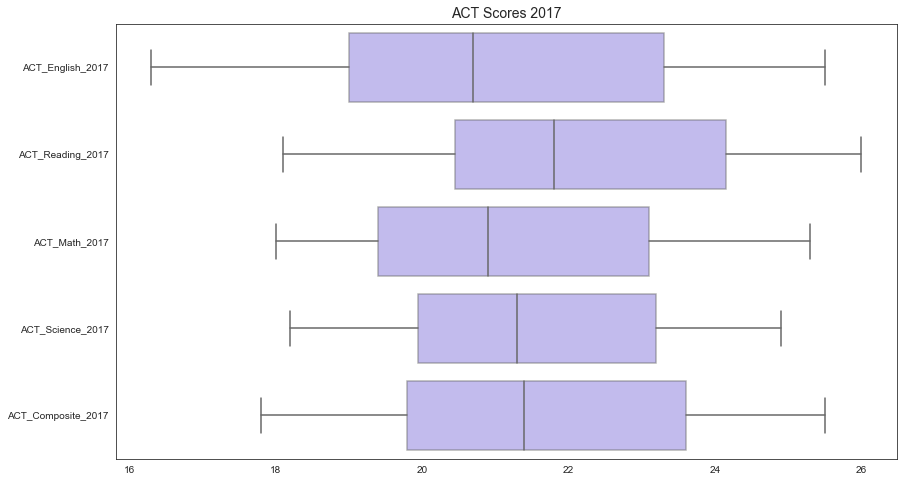

In [225]:
# Code 'mediumslateblue' 'darkgoldenrod'
plt.figure(figsize = (14, 8))
plt.title('ACT Scores 2017', fontsize = 14)
sns.boxplot(data = act_sat_final[['ACT_English_2017', 'ACT_Reading_2017', 'ACT_Math_2017', 'ACT_Science_2017', 'ACT_Composite_2017']],
            orient = 'h',
            color = 'mediumslateblue', 
            boxprops = {'alpha': 0.5});

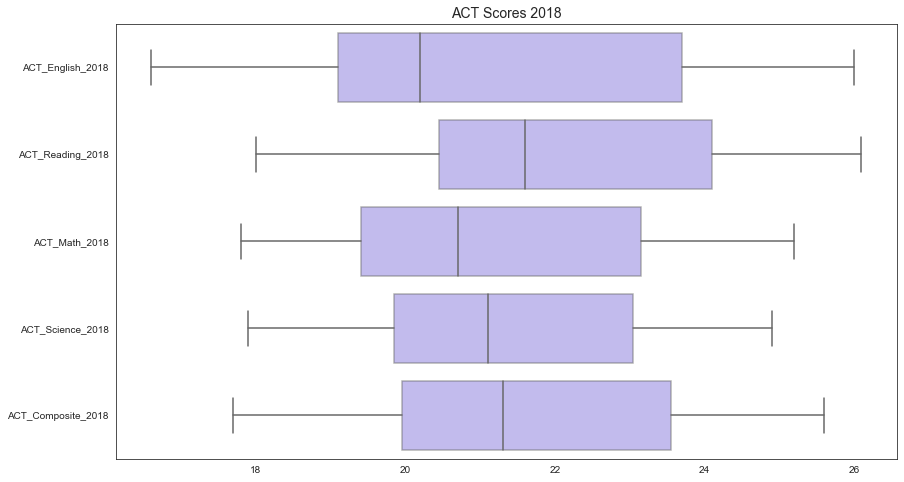

In [226]:
plt.figure(figsize = (14, 8))
plt.title('ACT Scores 2018', fontsize = 14)
sns.boxplot(data = act_sat_final[['ACT_English_2018', 'ACT_Reading_2018', 'ACT_Math_2018', 'ACT_Science_2018', 'ACT_Composite_2018']],
            orient = 'h',
            color = 'mediumslateblue', 
            boxprops = {'alpha': 0.5});

We can see that English has the widest range as well as the lowest average results for both years

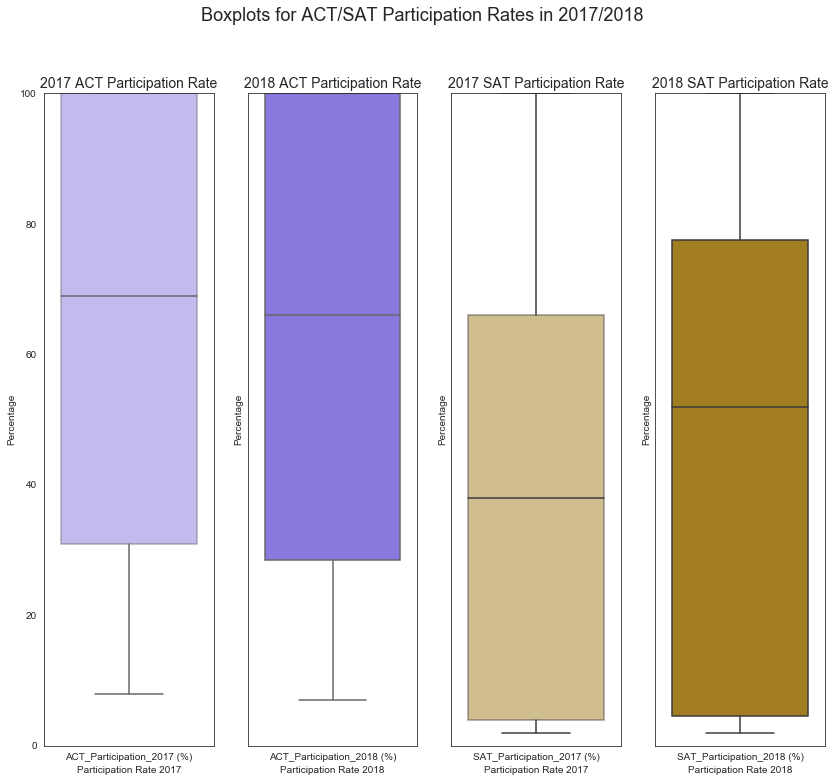

In [227]:
# Subplots on a single figure
fig, ax = plt.subplots(1, 4,figsize = (14, 12), sharey = True)
ax = ax.ravel()

ax[0] = sns.boxplot(data = act_sat_final[['ACT_Participation_2017 (%)']],
                    ax = ax[0],
                    color = 'mediumslateblue',
                    boxprops = {'alpha': 0.5})
ax[0].set_title('2017 ACT Participation Rate', fontsize = 14)
ax[0].set_xlabel('Participation Rate 2017')
ax[0].set_ylim([0,100])
ax[0].set_yticks(range(0,101,20))
ax[0].set_ylabel('Percentage')

ax[1] = sns.boxplot(data = act_sat_final[['ACT_Participation_2018 (%)']],
                    ax = ax[1],
                    color = 'mediumslateblue',
                    boxprops = {'alpha': 1})
ax[1].set_title('2018 ACT Participation Rate', fontsize = 14)
ax[1].set_xlabel('Participation Rate 2018')
ax[1].set_ylim([0,100])
ax[1].set_yticks(range(0,101,20))
ax[1].set_ylabel('Percentage')

ax[2] = sns.boxplot(data = act_sat_final[['SAT_Participation_2017 (%)']],
                    ax = ax[2],
                    color = 'darkgoldenrod',
                    boxprops = {'alpha': 0.5})
ax[2].set_title('2017 SAT Participation Rate', fontsize = 14)
ax[2].set_xlabel('Participation Rate 2017')
ax[2].set_ylim([0,100])
ax[2].set_yticks(range(0,101,20))
ax[2].set_ylabel('Percentage')

ax[3] = sns.boxplot(data = act_sat_final[['SAT_Participation_2018 (%)']],
                    ax = ax[3],
                    color = 'darkgoldenrod',
                    boxprops = {'alpha': 1})
ax[3].set_title('2018 SAT Participation Rate', fontsize = 14)
ax[3].set_xlabel('Participation Rate 2018')
ax[3].set_ylim([0,100])
ax[3].set_yticks(range(0,101,20))
ax[3].set_ylabel('Percentage')

plt.suptitle('Boxplots for ACT/SAT Participation Rates in 2017/2018', fontsize=18);

The boxplots basically continues to reaffirm that ACT has higher participation rate nationwide compared to SAT and that there is a significant increase in SAT participation rate from 2017 to 2018 which resulted in a decrease in 2018 ACT participation rate.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [228]:
final_columns = act_sat_final.columns.tolist()[1:]

In [229]:
all_xlabels = ['' for i in range (1,25)] # blank for all x-labels

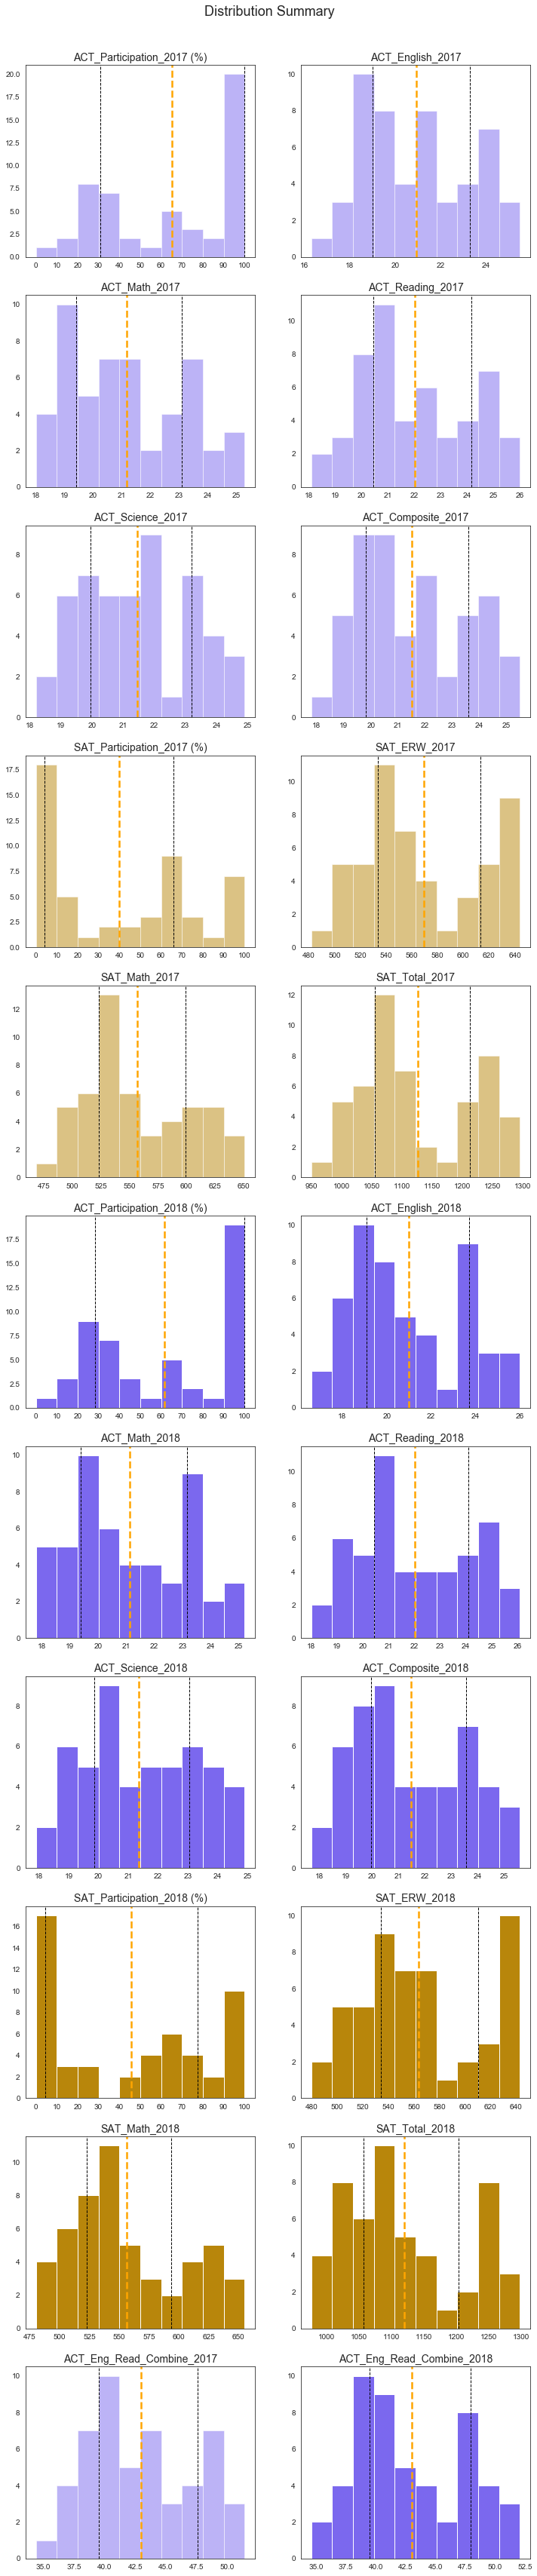

In [230]:
fig, ax = subplot_histograms(act_sat_final, 
                             final_columns, 
                             final_columns, 
                             all_xlabels, 
                             'Distribution Summary')
plt.subplots_adjust(top = 0.96);

Answers:

# 2017
## ACT

**Participation**

In the 90-100% bin, we can observer that ACT has 20 states with near 100% participation. This distribution is highly skewed to the left
    
**English**

The scores can be segregated into 3 distinct peaks; first quartile, second quartile and third quartile. First quartile results are likely skewed due to some states with higher participation rate resulting in lower scores. Second quartile results are likely skewed due to some mixture of states where participation rate is not mandatory on either test resulting in a split in test participation rate thus resulting in average scores. Third quartile results are likely skewed due to some states with lower participation rate resulting in higher scores. This distribution is skewed slightly right.   

**Math**

Like English the score is also segregated into 3 peaks albeit with the second quartile peak being much less distinct. However, the reasons for the repeating pattern is due to the high correlation (r > 0.9) between individual subject within the same type of test. This distribution is slightly right. 

**Reading**

Like English the score is also segregated into 3 distinch peaks, hence, we can expect similar trends. However, compared to all the other subjects Reading has an overall higher average nationwide compared to all the 3 other subjects. This distribution is skewed slightly right.

**Science**

Science results would fit a normalised distribution if not for the single major gap in the bin around 22.5, with only a single state included. 

**Composite**

The Composite is a accumulation of the distribution between the 4 subjects we can notice the 3 peaks albeit less distinct compared to English and a dip overall between bin 22 to 23 due to the large gap presented in the same area by the Science score. This distribution is skewed slightly to the right.

## SAT

**Participation**

In the 90-100% bin, we can observer that SAT has only 6 states with near 100% participation, and a surprising 17 within 0-10%. This shows that SAT is less prominent across the nation. This distribution is skewed highly right.

**Evidence-based Reading & Writing**

The score can be segregated into 2 distinch peaks; first quartile and at 640 bin. First quartile results are likely skewed due to some states with higher participation rate resulting in lower scores. At the 640 bin the results are likely skewed due to some states with lower participation rate resulting in higher scores. 

**Math**

Math resutls are similar to ERW, with one single difference in that the second peak is much lower compared to ERW. It is possible that SAT Math is more challenging compared to SAT ERW.

**Total**

The Total is the accumulation of the distribution between Math and ERW. Hence, the conclusions draw between ERW and Math would apply.


# 2018
## ACT

**Participation**

ACT participation was similar in 2018 as the previous year, but the top bin of 90-100% decreased from 20 to 19 states.  The distribution is highly skewed to the left.

**English**

Compared to 2017 results it is only segregated into 2 distinct peaks; first quartile and third quartile. First quartile results are likely skewed due to some states with higher participation rate resulting in lower scores. Third quartile results are likely skewed due to some states with lower participation rate resulting in higher scores. This distribution is skewed slightly right.   

**Math**

Like English the score is also segregated into 2 distinct, hence, we can expect the same trend. This distribution is slightly right. 

**Reading**

Like English the score is also segregated into 2 peaks, however, the second peak is much lower compare to English due to a more even distribution across the third quartile range. This distribution is skewed slightly right.

**Science**

Science results would fit a normalised distribution. 

**Composite**

The Composite is a accumulation of the distribution between the 4 subjects we can notice the 2 distinct peaks, hence, we can expect similar trends. This distribution is skewed slightly to the right.


## SAT

**Participation**

SAT participation at the 90-100% bin increased to 10 from only 6, a jump of 4 states. The distribution is visiually similar to that from 2017 but denser in the third and fourth quartiles. The distribution is highly skewed to the right.

**Evidence-based Reading & Writing**

The score can be segregated into 2 distinch peaks; first quartile and at 640 bin. First quartile results are likely skewed due to some states with higher participation rate resulting in lower scores. At the 640 bin the results are likely skewed due to some states with lower participation rate resulting in higher scores. 

**Math**

Math results are the most evenly distributed of all the plotted distribution with only a single outlier in between 525 to 560 bin with highest number of states; 14. While the rest of the bins have no more than 6 states

**Total**

The Total is the accumulation of the distribution between Math and ERW. We can observe that the distribution is much closer to ERW compared to Math. This is due to the nature of ERW being a combination of both English reading and writing.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

We do not observe any of this trend in most of the distribution. This shows that there is presense of human intervention like mandatory state test, selective bias from students in states where it neither tests are mandatory, as a results, students who are confident in the specific test will select for it and produce higher mean scores.

Number of states with 100% ACT Participation Rate 2017, 2018: 17, 17  
Number of states with 100% SAT Participation Rate 2017, 2018: 4, 5  
Number of states with single digit ACT Participation Rate 2017, 2018: 1, 1  
Number of states with single digit SAT Participation Rate 2017, 2018: 18, 17  

However, we do see something similar to a normal distribution in SAT Math 2018 score as well as ACT Science 2017 and 2018 scores.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

**Math**

Math distributions appear to be moderately normalized, as the peaks tend towards the second and third quartiles.  Any estimates made from this data can be considered with a large enough margin of error. ACT Math appears skewed right, and would guide estimates of outcomes towards the first quartile.

**Reading**

ACT Reading results are moderately normalized, which is reflected in part by the close proximity of the interquartile range.  Though it is slightly skewed right, results are densely concentrated in the middle.  

**Rates**

Rates are highly non-normal, with skewes to the left or right extremes. This is most certainly due to states with mandatory participation (100%) in ACT or SAT exams, as well as multiple states that do not mandate standardized college entry testing at all. Any predictions will be best informed by knowledge of the legal landscape of the states.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

It would makes as we can form coherent negative and positive hypothesis.  
Null Hypothesis: Participation rates for states between tests are unrelated and vary independently.  
Alternative Hypothesis: Participation rates for states between tests are statistically related.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

Is not appropriate as the scores are graded on a different scale and are administered with different formats.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [231]:
result = stats.ttest_ind(act_sat_final['ACT_Participation_2017 (%)'], act_sat_final['SAT_Participation_2017 (%)'])

In [232]:
results_2017 = stats.ttest_ind(act_sat_final['ACT_Participation_2017 (%)'], act_sat_final['SAT_Participation_2017 (%)'])
results_2018 = stats.ttest_ind(act_sat_final['ACT_Participation_2018 (%)'], act_sat_final['SAT_Participation_2018 (%)'])

In [233]:
results_2017.statistic, results_2017.pvalue

(3.8085778908170544, 0.00024134203698662353)

In [234]:
results_2018.statistic, results_2018.pvalue

(2.2471737667351626, 0.026826308222090527)

Looking at the pvalue we can reject the null hypothesis 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

The three states of interest will be Colorado [Source](https://www.testive.com/colorado-sat-change-2017/), Illinois [Source](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) and Rhode Island [Source](https://www.ride.ri.gov/InsideRIDE/AdditionalInformation/News/ViewArticle/tabid/408/ArticleId/387/Rhode-Island-to-Adopt-New-State-Assessment-Service-Providers.aspx). From all 3 sources we can see that they all implemented mandatory SAT test for the school year of 2017-2018 this resulted in the jump for Colorado in terms of participation from a rate 11% in 2017 to 100% in 2018, Illinois from 9% to 99% and lastly Rhode Island from 71% to 97%.

<img src="../images/mandatory_test.png" />  
[Image Source](https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/)
<img src="../images/usa_map.png" /> 
[Image_Source](https://news.gallup.com/poll/247025/democratic-states-exceed-republican-states-four-2018.aspx)
<img src="../images/sat_2018_map.png" /> 

From the 1st image we can see that 9 states mandates SAT, 12 states mandates ACT, 3 states mandates either ACT or SAT and 27 remaining states are non-mandated, this presents **opportunities**. 

Comparing 2nd image with the 3rd image we can see that democratic leaning states tend to prefer SAT tests, in majority of the republican learning states most of the SAT tests participaiton rate are single digits. Apart from a few outliers, like Idaho (100%) , Indiana (63%) and South Carolina (55%). This shows the correlation that states which are democratic leaning will likely be easier to lobby for a state wide SAT test.

Apart from that we can also ensure legislation adopt SAT's SAT School Day [Source](https://collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day/about) as this will help provide access to groups that are under represented on college campuses (e.g. students who attend high-poverty public schools) it will also eliminate barriers associated with weekend test administrations.

In [235]:
act_sat_final[act_sat_final['State'] == 'Rhode Island']

,State,ACT_Participation_2017 (%),ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017,SAT_Participation_2017 (%),SAT_ERW_2017,SAT_Math_2017,...,ACT_Math_2018,ACT_Reading_2018,ACT_Science_2018,ACT_Composite_2018,SAT_Participation_2018 (%),SAT_ERW_2018,SAT_Math_2018,SAT_Total_2018,ACT_Eng_Read_Combine_2017,ACT_Eng_Read_Combine_2018
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539,524,...,23.6,25.0,23.5,24.2,97.0,513,505,1018,48.7,49.4


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In reviewing ACT and SAT participation data from 2017 and 2018, we recommend that the College Board prioritize its marketing and lobbying efforts in **New Mexico**.

The College Board should seize the opportunity to lobbying efforts in New Mexico based on both statistical and environmental factors.  

In [236]:
act_sat_final[act_sat_final['State'] == 'New Mexico'][['SAT_Participation_2017 (%)', 
                                                       'SAT_Participation_2018 (%)',
                                                       'ACT_Participation_2017 (%)', 
                                                       'ACT_Participation_2018 (%)']]

,SAT_Participation_2017 (%),SAT_Participation_2018 (%),ACT_Participation_2017 (%),ACT_Participation_2018 (%)
31,11.0,16.0,66.0,67.0


**New Mexico** is selected based on 3 criterias, first as of 2018 it is a state with no mandatory testing for either SAT or ACT. Secondly, it is a democratic leaning state. Lastly, it has low SAT participation rate of 16% this means that there is a 525% increase in participation in the event that SAT is made mandatory in 2019.

Strategy

1) Lobby the State and Local Governments

The SAT can be offered for free or at a discounted price to students at both the state level and the municipal - even if a state doesn't provide for all. Currently, none of these programs exist at the state level in New Mexico, and a more compelling case can be made in its favor.

2) Leverage State Neighbors' Successes

Makes use of trends from neighboring states like Texas and Colorado. Leaning more towards Colorado due to the similarities in terms of political leaning. 